# Uppgift 1 
- uppvärmning covid-19 data

- Importerar pandas osv
- laddar filer 
- - laddar bladet "Veckodata Riket"

In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import os
from pathlib import Path

covid_data_directory = '../filer\\Folkhalsomyndigheten_Covid19.xlsx'
vaccin_data_directory = '../filer\\Folkhalsomyndigheten_Covid19_Vaccine.xlsx'


covid_data = pd.read_excel(covid_data_directory, sheet_name='Veckodata Riket')

#  Initial dataanalys


# covid_data.info()

- Listar information om datatyper och dylikt
- Det är 142 rader från 0 till 141
- det är 13 kolumner
- det finns 142 non-null vilket betyder att det finns inget tomt värde i någon kolumn.
- dtypes = datatyper för varje kolumn. Här kan vi se att det finns 2 kolumner med float64 och 11 kolumner med int64


In [2]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   år                              142 non-null    int64  
 1   veckonummer                     142 non-null    int64  
 2   Antal_fall_vecka                142 non-null    int64  
 3   Antal_fall_100000inv_vecka      142 non-null    int64  
 4   Antal_fall_100000inv_14dagar    142 non-null    int64  
 5   Kum_antal_fall                  142 non-null    int64  
 6   Kum_fall_100000inv              142 non-null    int64  
 7   Antal_nyaintensivvårdade_vecka  142 non-null    int64  
 8   Kum_antal_intensivvårdade       142 non-null    int64  
 9   Antal_avlidna_vecka             142 non-null    int64  
 10  Antal_avlidna_milj_inv_vecka    142 non-null    float64
 11  Kum_antal_avlidna               142 non-null    int64  
 12  Kum_antal_avlidna_milj_inv      142 

# covid_data.describe()
- Denna metod visar en statisktisk sammanfattning av datan i dataframe 
- - Den visar olika omfång på datan som Count, Mean, STD, Min, Max, Första kvartilen, median och tredje kvartilen.

**Vi tittar på kolumnen "Antal_fall_vecka"**
- **Count:** Denna visar antal icke-null dvs icke tomma värden i varje kolumn 
- - Det finns 142 icke-null värden
- **Mean:** Visar genomsnittliga värdet eller medelvärdet av alla värden i varje kolumn.
- - genomsnittligt antal fall per vecka är ca 18 378
- **STD (standardavvikelse):** Denna visar hur mycket värdena varierar i en kolumn och eller sprids ut från medelvärdet. Om standardavvikelsen är hög så är värdena mer spridda.
- - 38569.455753 = stor avvikelse = stor variation på antal fall från vecka till vecka.
- **min:** det minsta värdet i varje kolumn
- - Veckor utan rapporterade fall = 0
- **25%(första kvartilen):** 25% av värdena i kolumnen är mindre än detta värde
- - 25% av veckorna hade 3 075 fall eller färre.
- **50%(median):** hälften av värdena i kolumnen är mindre än detta värde
- - 50% av veckorna hade 5 531 fall eller färre
- **75%(tredje kvartilen):** 75% av värdena i kolumnen är mindre än detta värde
- - 75% av av veckorna hade 21 125 fall eller färre
- **max:** största värdet i varje kolumn
- - den vecka med högst antal fall hade 26 5043

In [3]:
covid_data.describe()

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
count,142.000000,142.000000,142.000000,142.000000,142.000000,1.420000e+02,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,2020.957746,26.035211,18378.345070,177.197183,354.169014,1.125288e+06,10843.281690,67.176056,6000.464789,144.936620,14.000000,12321.154930,1187.840841
std,0.797809,14.228835,38569.455753,371.689114,725.677174,9.618084e+05,9265.100705,73.435000,3076.853993,173.659331,16.796551,6103.235009,587.255605
min,2020.000000,1.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.000000,14.000000,3075.000000,30.000000,59.750000,1.014860e+05,982.500000,14.000000,2643.750000,25.250000,2.425000,5880.000000,569.375000
50%,2021.000000,26.000000,5531.000000,53.000000,107.500000,1.085848e+06,10461.500000,27.500000,7559.500000,77.500000,7.450000,14610.500000,1407.650024
75%,2022.000000,37.750000,21125.000000,203.500000,421.250000,2.423603e+06,23350.500000,109.000000,8863.250000,185.500000,17.950000,17177.750000,1654.999969
max,2022.000000,53.000000,265043.000000,2554.000000,5024.000000,2.609725e+06,25144.000000,289.000000,9539.000000,664.000000,64.300003,20581.000000,1982.900024


# covid_data.head()

- Listar dom 5 första inklusive rad 0 som standard
- om man sätter in en siffra i () så får jag antalet rader som står där. <br>
Men man måste tänka på att den börjar från 0 dvs med 0 inkluderad, så skriver jag 50 så kommer den visa upp till rad 49.

In [4]:
covid_data.head()

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020,6,1,0,0,1,0,0,0,0,0.0,0,0.0
1,2020,7,0,0,0,1,0,0,0,0,0.0,0,0.0
2,2020,8,0,0,0,1,0,0,0,0,0.0,0,0.0
3,2020,9,13,0,0,14,0,0,0,0,0.0,0,0.0
4,2020,10,211,2,2,225,2,3,3,0,0.0,0,0.0


# covid_data.value_counts()
- Räknar antalet unika värden i en kolumn. Kan användas till tex kategorisk data.
- Visar antalet icke-nullvärden i varje kolumn.
- - Här kan vi se att den har 142 
- - om vi kör **covid_data['år'].value_counts()** så kan man konstatera att datan i dataframe handlar om 3 år 2021, 2020 och 2022.<br>
På varje år så kan man också se hur många datapunkter/värden det finns där man kan tolka att värdena=veckor.

In [5]:
#covid_data.value_counts()

covid_data['år'].value_counts()

år
2021    52
2020    48
2022    42
Name: count, dtype: int64

# covid_data.columns

- Visar rubrikerna till varje kolumn
- Detta gör det enklare att navigera ett dokument och pin pointa vad man vill kolla på.

In [6]:
covid_data.columns


Index(['år', 'veckonummer', 'Antal_fall_vecka', 'Antal_fall_100000inv_vecka',
       'Antal_fall_100000inv_14dagar', 'Kum_antal_fall', 'Kum_fall_100000inv',
       'Antal_nyaintensivvårdade_vecka', 'Kum_antal_intensivvårdade',
       'Antal_avlidna_vecka', 'Antal_avlidna_milj_inv_vecka',
       'Kum_antal_avlidna', 'Kum_antal_avlidna_milj_inv'],
      dtype='object')

# covid_data.index
- Visar indexet för DataFrame.
- Index är som radnummer i Excel.
- Index är bra för att hitta och identifiera data. Man kollar på kolumn + index.
- I outputen kan vi se RangeIndex(start=0, stop=142, step=1)
- - Start är startvärdet där bladet börjar då som är 0
- - Stop är det sista indexvärdet som i detta fallet är 142.<br>
En sak som är viktig att notera är att det verkliga sista indexvärdet är
141 dvs stop - 1.
- - Step är ett stegvärde för indexet. Så varje stegvärde ökar med 1 från det värdet innan.

In [7]:
covid_data.index

RangeIndex(start=0, stop=142, step=1)

# Uppgift 1 b - slå ihop kolumner till specifikt format

In [8]:
covid_data['år'] = covid_data['år'].astype(str)                             # Strängmanipulation - konverterar om till sträng och objekt
covid_data['veckonummer'] = covid_data['veckonummer'].astype(str)

covid_data['Vecka'] = [f"{år}v{veckonr.zfill(2)}" for år, veckonr in zip(covid_data['år'], covid_data['veckonummer'])]   # Sammanfogning av 'år' och 'veckonummer' till en ny kolumn 'Vecka'
covid_data = covid_data.sort_values(by="Vecka")

In [9]:
print(covid_data.head())  # Vi ser att nya kolumnen är inkluderad genom denna metod

     år veckonummer  Antal_fall_vecka  Antal_fall_100000inv_vecka  \
0  2020           6                 1                           0   
1  2020           7                 0                           0   
2  2020           8                 0                           0   
3  2020           9                13                           0   
4  2020          10               211                           2   

   Antal_fall_100000inv_14dagar  Kum_antal_fall  Kum_fall_100000inv  \
0                             0               1                   0   
1                             0               1                   0   
2                             0               1                   0   
3                             0              14                   0   
4                             2             225                   2   

   Antal_nyaintensivvårdade_vecka  Kum_antal_intensivvårdade  \
0                               0                          0   
1                             

In [10]:
print(covid_data['Vecka'].head()) # Här kan vi också se specifikt den kolumnens innehålls första rader

0    2020v06
1    2020v07
2    2020v08
3    2020v09
4    2020v10
Name: Vecka, dtype: object


In [11]:
print(covid_data.columns) # Genom att bara visa kolumnnamn så kan vi försäkra oss om att den nya kolumnen är inkluderad

Index(['år', 'veckonummer', 'Antal_fall_vecka', 'Antal_fall_100000inv_vecka',
       'Antal_fall_100000inv_14dagar', 'Kum_antal_fall', 'Kum_fall_100000inv',
       'Antal_nyaintensivvårdade_vecka', 'Kum_antal_intensivvårdade',
       'Antal_avlidna_vecka', 'Antal_avlidna_milj_inv_vecka',
       'Kum_antal_avlidna', 'Kum_antal_avlidna_milj_inv', 'Vecka'],
      dtype='object')


In [12]:
print(covid_data.info()) # Denna metod ger oss en sammanfattning av dataframe, inkl index, kolumntyper och antal non-null värden. Här får man det bekräftat att det stämmer.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   år                              142 non-null    object 
 1   veckonummer                     142 non-null    object 
 2   Antal_fall_vecka                142 non-null    int64  
 3   Antal_fall_100000inv_vecka      142 non-null    int64  
 4   Antal_fall_100000inv_14dagar    142 non-null    int64  
 5   Kum_antal_fall                  142 non-null    int64  
 6   Kum_fall_100000inv              142 non-null    int64  
 7   Antal_nyaintensivvårdade_vecka  142 non-null    int64  
 8   Kum_antal_intensivvårdade       142 non-null    int64  
 9   Antal_avlidna_vecka             142 non-null    int64  
 10  Antal_avlidna_milj_inv_vecka    142 non-null    float64
 11  Kum_antal_avlidna               142 non-null    int64  
 12  Kum_antal_avlidna_milj_inv      142 

In [13]:
print(covid_data['Vecka'].isna().sum()) # Kontroll av saknade data i 'vecka' kolumnen av COVID-19 Dataset

0


# Uppgift 1c-1f Seaborn
- Subplots 2x2
- Skapade en funktion som gjorde veckorna mer hanterbara då det var så många veckor
- Sparande av grafer till visualiseringar mappen med vit bakgrund

In [14]:
def make_ticks(weeks, n):     # Funktion för att göra veckorna mer synliga för min 2x2 plot
    return[week for i, week in enumerate(weeks) if i % n == 0]

weeks = covid_data['Vecka'].unique()
weeks_ticks = make_ticks(weeks, 10) # Gjorde att den visade veckorna var 10:e vecka


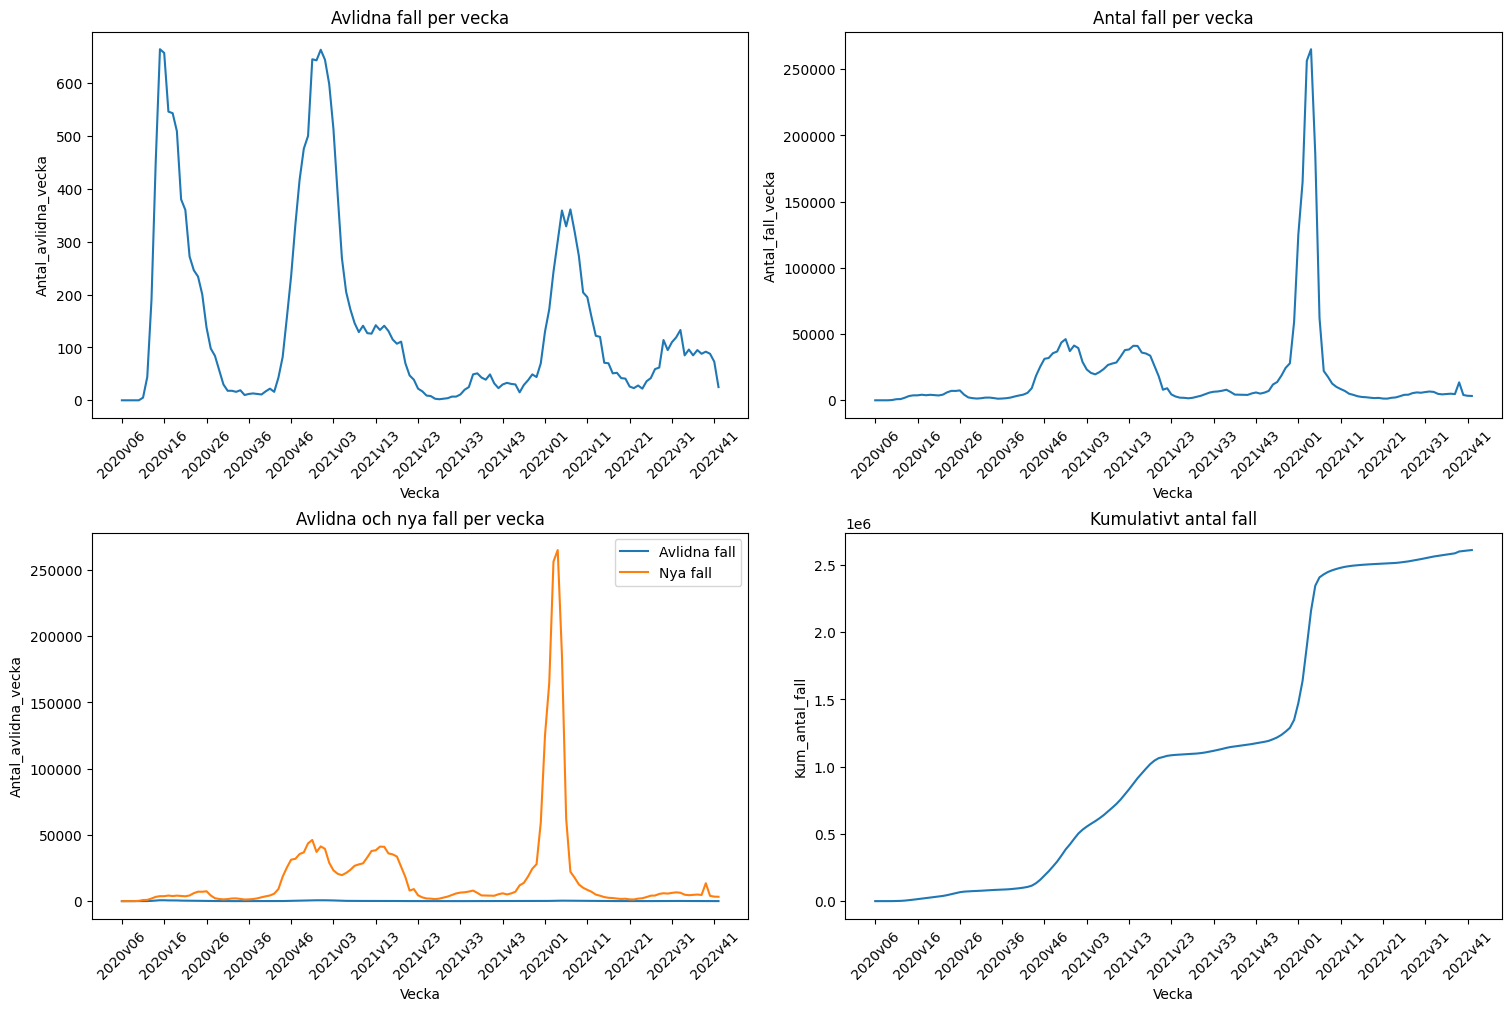

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10), constrained_layout=True)


# Uppgift 1c avlidna fall per vecka
sns.lineplot(data=covid_data, x='Vecka', y='Antal_avlidna_vecka', ax=axs[0, 0])
axs[0, 0].set_title('Avlidna fall per vecka')
axs[0, 0].set_xticks(weeks_ticks)
axs[0, 0].tick_params(axis='x', rotation=45)

# Uppgift 1d - Nya fall per vecka
sns.lineplot(data=covid_data, x='Vecka', y='Antal_fall_vecka', ax=axs[0, 1])
axs[0, 1].set_title('Antal fall per vecka')
axs[0, 1].set_xticks(weeks_ticks)
axs[0, 1].tick_params(axis='x', rotation=45)

# Uppgift 1e - Avlidna och nya fall per vecka (kombinationsgraf)
sns.lineplot(data=covid_data, x='Vecka', y='Antal_avlidna_vecka', label='Avlidna fall', ax=axs[1, 0])
sns.lineplot(data=covid_data, x='Vecka', y='Antal_fall_vecka', label='Nya fall', ax=axs[1, 0])
axs[1, 0].set_title('Avlidna och nya fall per vecka')
axs[1, 0].set_xticks(weeks_ticks)
axs[1, 0].tick_params(axis='x', rotation=45)
axs[1, 0].legend()

# Uppgift 1f - Kumulativt antal fall
sns.lineplot(data=covid_data, x='Vecka', y='Kum_antal_fall', ax=axs[1, 1])
axs[1, 1].set_title('Kumulativt antal fall')
axs[1, 1].set_xticks(weeks_ticks)
axs[1, 1].tick_params(axis='x', rotation=45)

plt.savefig('../visualiseringar/covid_subplots.png', facecolor='white', bbox_inches='tight')
plt.show()






# Uppgift 1c-f plotly
- Grafer som visualiserar samma data som ovan fast i Plotly
- Funktion för att spara plotly grafer som html till mappen visualiseringar

In [16]:
def save_plotly_fig(fig, filename, directory="../visualiseringar"):

    Path(directory).mkdir(parents=True, exist_ok=True)
    filepath = f"{directory}/{filename}.html"
    fig.write_html(filepath)
    print(f"Figure saved as {filepath}")
    

In [17]:
fig = px.line(
    covid_data,
    x='Vecka', 
    y='Antal_avlidna_vecka', 
    title='Avlidna fall per vecka'
)
save_plotly_fig(fig, "avlidna_fall_per_vecka")
fig.show()

Figure saved as ../visualiseringar/avlidna_fall_per_vecka.html


In [18]:
fig = px.line(
    covid_data, 
    x='Vecka',
    y='Antal_fall_vecka',
    title='Nya fall per vecka'
)
save_plotly_fig(fig, "Nya_fall_per_vecka")
fig.show()



Figure saved as ../visualiseringar/Nya_fall_per_vecka.html


In [19]:
fig = px.line(
    covid_data, 
    x='Vecka'
)

fig.add_scatter(x=covid_data['Vecka'], y=covid_data['Antal_avlidna_vecka'], mode='lines', name='Avlidna fall')
fig.add_scatter(x=covid_data['Vecka'], y=covid_data['Antal_fall_vecka'],mode='lines', name='Nya fall')

fig.update_layout(
    title='Avlidna och Nya fall per vecka', 
    xaxis_title='Vecka', 
    yaxis_title='Antal fall'
)
save_plotly_fig(fig, "Avlidna_och_nya_fall_per_vecka")
fig.show()

Figure saved as ../visualiseringar/Avlidna_och_nya_fall_per_vecka.html


In [20]:
fig = px.line(
    covid_data, 
    x='Vecka', 
    y='Kum_antal_fall', 
    title='Kumulativt antal fall'
)
save_plotly_fig(fig, "Kumulativt antal fall")
fig.show()

Figure saved as ../visualiseringar/Kumulativt antal fall.html
